### Washington data

In [2]:
pwd()

'c:\\Users\\max-admin\\Desktop\\Masterstudium\\Masterarbeit\\Master_Thesis\\Data'

In [5]:
import pandas as pd

# Replace 'your_file.txt' with the path to your text file
file_path = 'Data/DC_data/2015/taxi_2015_04.txt'
# Read the file using pandas
df = pd.read_csv(file_path, delimiter='|')

# Now df is a DataFrame containing your data

df

,OBJECTID,TRIPTYPE,PROVIDERNAME,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,...,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LATITUDE,DESTINATION_BLOCK_LONGITUDE,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,742056,1,DC VIP Cab,5.14,0.0,0.25,0.00,0.0,5.39,2,...,0.0,38.909243,-77.031952,1400 - 1499 BLOCK OF 14TH STREET NW,38.916645,-77.038473,1918 - 1999 BLOCK OF 17TH STREET NW,N,04/01/2015 00:00,04/01/2015 00:00
1,745242,1,DC VIP Cab,10.54,0.0,0.25,0.00,0.0,10.79,1,...,0.0,38.900774,-77.039447,800 - 899 BLOCK OF 17TH STREET NW,NaN,NaN,NaN,N,04/01/2015 00:00,04/01/2015 00:00
2,747273,1,DC VIP Cab,9.73,1.5,0.25,0.00,0.0,11.48,1,...,0.0,38.895465,-77.022963,400 - 499 BLOCK OF 8TH STREET NW,38.921848,-77.036490,2400 - 2479 BLOCK OF 16TH STREET NW,N,04/01/2015 00:00,04/01/2015 00:00
3,747549,1,DC VIP Cab,6.76,0.0,0.25,0.00,0.0,7.01,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,04/01/2015 00:00,04/01/2015 00:00
4,747576,1,UVC,14.05,0.0,0.25,4.25,0.0,18.30,2,...,0.0,NaN,NaN,NaN,38.900207,-77.015567,300 - 319 BLOCK OF H STREET NW,Y,04/01/2015 00:00,04/01/2015 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875010,12342257,1,Yellow Cab,33.22,8.6,0.25,1.25,0.0,43.07,1,...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,N,04/30/2015 16:00,04/30/2015 16:00
875011,12342259,1,Yellow Cab,7.30,0.0,0.25,0.25,0.0,7.55,2,...,0.0,38.897833,-77.031959,600 - 699 BLOCK OF 14TH STREET NW,NaN,NaN,NaN,N,04/30/2015 02:00,04/30/2015 02:00
875012,12342260,1,Yellow Cab,24.31,0.0,0.25,0.25,0.0,24.56,2,...,20.0,38.906850,-77.041686,1218 - 1299 BLOCK OF 18TH STREET NW,NaN,NaN,NaN,N,04/30/2015 21:00,04/30/2015 21:00
875013,12342261,1,Yellow Cab,9.73,0.0,0.25,2.25,0.0,11.98,2,...,9.0,38.894787,-76.997549,600 - 649 BLOCK OF D STREET NE,38.885213,-77.021910,300 - 399 BLOCK OF 7TH STREET SW,N,04/30/2015 10:00,04/30/2015 10:00


In [8]:
import os
import pandas as pd

def read_and_merge_multiyear_data(years, base_path='DC_data'):
    """
    Reads in, aggregates, and merges data for each month of specified years into one DataFrame,
    excluding January 2015 and adjusting for file format and delimiter changes.
    The ORIGINDATETIME_TR column is converted to a pandas datetime object, normalized to date.

    Parameters:
    years (list of str): The years for which to read the data.
    base_path (str): The base path where the data files are stored.

    Returns:
    pandas.DataFrame: A DataFrame containing the aggregated and merged data for all specified years.
    """
    aggregated_dfs = []

    # Iterate over each year
    for year in years:
        # Iterate over all months
        for month in range(1, 13):
            # Exclude January 2015
            if year == '2015' and month == 1:
                continue

            # Determine file extension and delimiter based on year and month
            if int(year) >= 2019 and month >= 7:
                file_extension = 'csv'
                delimiter = ','
            else:
                file_extension = 'txt'
                delimiter = '|'

            # Construct the file path
            file_path = os.path.join(base_path, year, f'taxi_{year}_{month:02d}.{file_extension}')

            # Check if the file exists
            if os.path.exists(file_path):
                # Read the file with appropriate delimiter
                df = pd.read_csv(file_path, delimiter=delimiter)

                # Convert ORIGINDATETIME_TR to datetime and normalize to date
                df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR']).dt.normalize()

                # Filter out rows where 'AIRPORT' is 'Y'
                df = df[df['AIRPORT'] != 'Y']

                # Aggregate data
                aggregated_df = df.groupby(['ORIGINZIP', 'ORIGINDATETIME_TR']).agg(
                    trip_count=('ORIGINZIP', 'count'),
                    average_mileage=('MILEAGE', 'mean'),
                    average_totalamount=('TOTALAMOUNT', 'mean')
                ).reset_index()

                # Append aggregated data
                aggregated_dfs.append(aggregated_df)

    # Concatenate all aggregated dataframes
    merged_aggregated_df = pd.concat(aggregated_dfs, ignore_index=True)

    return merged_aggregated_df

# Example usage
years = ['2015','2016','2017','2018','2019']  # Specify the years you want to include
aggregated_data = read_and_merge_multiyear_data(years)


C:\Users\max-admin\AppData\Local\Temp\ipykernel_21492\186558185.py:41: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter)
C:\Users\max-admin\AppData\Local\Temp\ipykernel_21492\186558185.py:41: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter)
C:\Users\max-admin\AppData\Local\Temp\ipykernel_21492\186558185.py:41: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter)
C:\Users\max-admin\AppData\Local\Temp\ipykernel_21492\186558185.py:41: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter)
C:\Users\max-admin\AppData\Local\Temp\ipykernel_21492\186558185.py:41: DtypeWarning: Columns (15) have mi

In [19]:
aggregated_data

,ORIGINZIP,ORIGINDATETIME_TR,trip_count,average_mileage,average_totalamount
0,0,2015-02-01,32,NaN,33.000000
1,0,2015-02-02,69,NaN,33.000000
2,0,2015-02-03,40,NaN,33.000000
3,0,2015-02-04,65,NaN,33.000000
4,0,2015-02-05,45,NaN,33.000000
...,...,...,...,...,...
285305,US,2019-12-27,5,0.000000,10.612000
285306,US,2019-12-28,1,3.550000,12.410000
285307,US,2019-12-29,3,0.000000,9.173333
285308,US,2019-12-30,6,2.608333,13.320000


In [20]:
climate

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TMAX
0,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2015-01-01,8.28,0.00,0.0,0.0,47
1,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2015-01-02,2.91,0.00,0.0,0.0,49
2,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2015-01-03,3.36,0.50,0.0,0.0,42
3,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2015-01-04,12.53,0.20,0.0,0.0,67
4,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2015-01-05,14.32,0.00,0.0,0.0,52
...,...,...,...,...,...,...,...,...
1821,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2019-12-27,4.03,0.00,0.0,0.0,56
1822,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2019-12-28,3.80,0.00,0.0,0.0,67
1823,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2019-12-29,5.14,0.60,0.0,0.0,53
1824,USW00013743,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",2019-12-30,7.61,0.26,0.0,0.0,66


In [15]:
aggregated_data.to_csv("DC_data/merged_grouped_DC.csv")

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import holidays
from matplotlib.cbook import boxplot_stats 

def fahrenheit_to_celsius(f):
        return (f - 32) * 5/9


def process_DC_zipcode():
    """
    Merges aggregated chicago cab date with weather data and creates a csv file for
    further analysis
    
    input: PU_or_DO: string, either "PU" or "DO"    
    
    """


    trips = pd.read_csv("DC_data/merged_grouped_DC.csv")
    
    # first drop mileage and total amount
    trips.drop(columns=["average_mileage", "average_totalamount"], inplace=True)


    climate = pd.read_csv("DC_data/weather_DC.csv")
    climate.drop(columns=["SNOW","SNWD", "NAME" , "STATION"], inplace = True)

    # sort by date
    trips = trips.sort_values(by=['ORIGINDATETIME_TR']).reset_index(drop=True)
    # drop Nas 
    trips = trips.dropna()
    

    # merge trips and climate data on date
    trips = pd.merge(trips, climate, how='left', left_on='ORIGINDATETIME_TR', right_on='DATE')

    us_holidays = holidays.US()

    # Create a new column indicating whether each date is a holiday or not
    trips['holiday'] = trips['ORIGINDATETIME_TR'].apply(lambda x: 1 if x in us_holidays else 0)


    # Apply the conversion function to the Fahrenheit column
    trips['TMAX'] = trips['TMAX'].apply(fahrenheit_to_celsius)

    # add a weekday index to the dataframe starting with Mondays = 0 tuesdays = 1 etc.
    trips['Weekday_index'] = pd.to_datetime(trips['ORIGINDATETIME_TR']).dt.dayofweek

    taxi_data = trips

    # rename columns
    taxi_data.rename(columns={'ORIGINDATETIME_TR':'date_pickup' , 'ORIGINZIP' : 'PULocationID' , 'trip_count' : 'trip_number' , 'TMAX' : 'tmax_obs'}, inplace=True)
    

    # add month and year factors
    taxi_data['Year_fact'] = pd.factorize(pd.to_datetime(taxi_data['date_pickup']).dt.year)[0] + 1
    taxi_data['Month_fact'] = pd.factorize(pd.to_datetime(taxi_data['date_pickup']).dt.month)[0] + 1
    # log the dependent variable
    taxi_data['log_total'] = np.log(taxi_data['trip_number'] + 1)
    # remove NAs
    taxi_data = taxi_data.dropna(subset=['tmax_obs'])

    # add chebyshev_polynomials

    taxi_data["cheby_0"] = 1
    taxi_data["cheby_1"] = pd.to_datetime(taxi_data['date_pickup']).dt.dayofyear

    # recursively defining other chebyshev polynomials for each day until 5th order
    for i in range(2, 6):
        taxi_data[f"cheby_{i}"] = (2  * taxi_data["cheby_1"] * taxi_data[f"cheby_{i-1}"]) - taxi_data[f"cheby_{i-2}"]

    # outlier filtering
    out_weekdays = pd.DataFrame()
    filtered_weekdays = pd.DataFrame()
    counter = 1
    for z in taxi_data[f'PULocationID'].unique():
        zcta_data = taxi_data[taxi_data[f'PULocationID'] == z]
        for w in taxi_data['Weekday_index'].unique():
            zcta_weekday = zcta_data[zcta_data['Weekday_index'] == w]
            out = np.ravel(boxplot_stats(zcta_weekday['log_total'])[0]['fliers'])
            out_ids = np.where(np.isin(zcta_weekday['log_total'], out))[0]
            out_df = zcta_weekday.iloc[out_ids]
            zcta_filtered = zcta_weekday = zcta_weekday.drop(out_df.index)
            if counter == 1:
                out_weekdays = out_df
                filtered_weekdays = zcta_filtered
            else:
                out_weekdays = pd.concat([out_weekdays, out_df])
                filtered_weekdays = pd.concat([filtered_weekdays, zcta_filtered])
            counter += 1


    # add temperature bins
    sequence_bins = np.arange(np.floor(taxi_data['tmax_obs'].min()), np.ceil(taxi_data['tmax_obs'].max()) + 1, 3)
    temp_bins = pd.cut(taxi_data['tmax_obs'], bins=sequence_bins, include_lowest=True, ordered = True)
    taxi_data['temp_bins'] = temp_bins

    # restrict taxi_data to temperature range -13 to 35
    taxi_data_cut = taxi_data[(taxi_data['tmax_obs'] >= -13) & (taxi_data['tmax_obs'] <= 35)]

    taxi_data_cut.to_csv(f"DC_data/DC_regression_zipcodes.csv", index=False)


In [26]:
process_DC_zipcode()

In [28]:
DC_PU = pd.read_csv("DC_data/DC_regression_zipcodes.csv")

C:\Users\max-admin\AppData\Local\Temp\ipykernel_21492\1468464525.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  DC_PU = pd.read_csv("DC_data/DC_regression_zipcodes.csv")


In [41]:
DC_PU

,Unnamed: 0,PULocationID,date_pickup,trip_number,DATE,AWND,PRCP,tmax_obs,holiday,Weekday_index,Year_fact,Month_fact,log_total,cheby_0,cheby_1,cheby_2,cheby_3,cheby_4,cheby_5,temp_bins
0,0,0,2015-02-01,32,2015-02-01,4.03,0.04,6.666667,0,6,1,1,3.496508,1,0.000570,-0.999999,-0.001711,0.999997,0.002852,"[5.0, 8.0]"
1,1,0,2015-02-02,69,2015-02-02,12.30,0.09,10.000000,0,0,1,1,4.248495,1,0.001141,-0.999997,-0.003423,0.999990,0.005704,"[8.0, 11.0]"
2,2,0,2015-02-03,40,2015-02-03,9.40,0.00,3.888889,0,1,1,1,3.713572,1,0.001711,-0.999994,-0.005134,0.999977,0.008557,"[2.0, 5.0]"
3,3,0,2015-02-04,65,2015-02-04,8.72,0.00,12.777778,0,2,1,1,4.189655,1,0.002282,-0.999990,-0.006845,0.999958,0.011409,"[11.0, 14.0]"
4,4,0,2015-02-05,45,2015-02-05,16.78,0.00,6.666667,0,3,1,1,3.828641,1,0.002852,-0.999984,-0.008557,0.999935,0.014261,"[5.0, 8.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278615,282005,20190,2019-12-31,1,2019-12-31,8.50,0.00,12.222222,0,1,5,11,0.693147,1,1.000000,1.000000,1.000000,1.000000,1.000000,"[11.0, 14.0]"
278616,285067,22302,2019-12-31,2,2019-12-31,8.50,0.00,12.222222,0,1,5,11,1.098612,1,1.000000,1.000000,1.000000,1.000000,1.000000,"[11.0, 14.0]"
278617,283593,20597,2019-12-31,3,2019-12-31,8.50,0.00,12.222222,0,1,5,11,1.386294,1,1.000000,1.000000,1.000000,1.000000,1.000000,"[11.0, 14.0]"
278618,283416,20560,2019-12-31,32,2019-12-31,8.50,0.00,12.222222,0,1,5,11,3.496508,1,1.000000,1.000000,1.000000,1.000000,1.000000,"[11.0, 14.0]"


In [39]:
from linearmodels.panel import PanelOLS


DC_PU['temp_bins'] = pd.Categorical(DC_PU['temp_bins'], ordered=False).astype(str)
DC_PU['temp_bins'] = DC_PU['temp_bins'].str.replace('\(', '[', regex=True)

# add cheby polynomials for chicago

num_days = len(DC_PU["date_pickup"].unique())

DC_PU["cheby_0"] = 1
DC_PU['cheby_1'] = DC_PU['date_pickup'].rank(method='dense').astype(int) / num_days

for i in range(2, 6):
    DC_PU[f"cheby_{i}"] = (2 * DC_PU["cheby_1"] * DC_PU[f"cheby_{i-1}"]) - DC_PU[f"cheby_{i-2}"]


panel_data = DC_PU.set_index(['PULocationID', 'Year_fact'])


model_formula = 'log_total ~ 1 +  C(temp_bins, Treatment(reference = "[14.0, 17.0]")) + PRCP + AWND + Weekday_index + holiday + + cheby_1 + cheby_2 + cheby_3 + cheby_4 + cheby_5 + EntityEffects + TimeEffects'

model = PanelOLS.from_formula(model_formula, data=panel_data)

# Fit the model
results_DC = model.fit(cov_type='clustered', cluster_entity=True)

# Print the regression results in latex format
print(results_DC)

                          PanelOLS Estimation Summary                           
Dep. Variable:              log_total   R-squared:                        0.0255
Estimator:                   PanelOLS   R-squared (Between):             -1.4056
No. Observations:              278620   R-squared (Within):              -0.0098
Date:                Wed, Nov 29 2023   R-squared (Overall):             -0.0271
Time:                        14:12:38   Log-likelihood                -3.008e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      328.38
Entities:                        2165   P-value                           0.0000
Avg Obs:                       128.69   Distribution:               F(22,276429)
Min Obs:                       1.0000                                           
Max Obs:                       1055.0   F-statistic (robust):             34.678
                            

In [36]:
def plot_regression(model_fit,dataset,fixed_effect_level,outcome):
    """
    Plots coefficients for log_trip number and their condifence intervals against each temperature bin.

    Inputs:
        model_fit: the fitted regression model
        dataset(str): Green,Yellow or FHV
        fixed_effect_level(str): Pickup or Dropoff Location
        outcome(str): Trip number or Trip distance
    
    
    Returns:
       Plot
    
    """
    results = model_fit

    # Prepare summary for plotting

    coefficients = results.params
    conf_int = results.conf_int()

    # Combine coefficients and confidence intervals into a single DataFrame
    df = pd.DataFrame(pd.concat([coefficients, conf_int], axis=1))
    df.columns = ['Coefficient', 'Lower CI', 'Upper CI']

    # convert the index into a regular column
    df.reset_index(inplace=True)

    # only keep the rows where index starts with C(temp_bins)
    df = df[df['index'].str.startswith('C(temp_bins')]

    # add temperature variable to the dataframe which drops everything from the string until the first "T."

    df['Temperature'] = df['index'].str.split(r'\[T\.').str[1].str[:-1]

    df.drop(columns=['index'], inplace=True)

    # Convert Temperature intervals into numerical values
    df['Temperature'] = df['Temperature'].str.strip('[]').str.split(',').apply(lambda x: (float(x[0]) + float(x[1])) / 2)
    # order the dataframe by temperature
    df = df.sort_values(by=['Temperature'])

    # convert the coeffients into percentages and adapt CI accordingly
    df['Coefficient'] = df['Coefficient'] * 100
    df['Lower CI'] = df['Lower CI'] * 100
    df['Upper CI'] = df['Upper CI'] * 100

    # Extract Temperature and Coefficient values
    temperature = df['Temperature']
    coefficient = df['Coefficient']

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(temperature, coefficient, color='blue', label='Data')
    plt.xlabel('Temperature')
    plt.ylabel(f'{outcome} response in %')
    plt.title(f'Mobility response by temperature bin- {dataset}')

    # Add confidence intervals if needed
    lower_ci = df['Lower CI']
    upper_ci = df['Upper CI']
    plt.errorbar(temperature, coefficient, yerr=[coefficient - lower_ci, upper_ci - coefficient], fmt='o', color='red' , capsize= 3,  barsabove = True , label='Confidence Interval')

    # Fit a polynomial
    degree = 2
    coefficients_poly = np.polyfit(temperature, coefficient, degree)
    y_poly = np.polyval(coefficients_poly, temperature)

    # Plot the polynomial curve
    plt.plot(temperature, y_poly, label=f'Polynomial Fit (Degree {degree})', color='green')

    # add a dotted line at 0 percent
    plt.axhline(y=0, color='blue', linestyle='--')

    # Add a legend
    plt.legend()
    plt.text(0.5, -0.15, f'Red dots show the coefficients for the temperature bins (each 3°C ) on log({outcome}) as the dependent variable in a panel regression which \n included month and {fixed_effect_level} fixed effects. Standard Errors are clustered at the borough level. Percentage change in trips is relative to the 16-19°C bin. \n Trips which started or ended at the airport are excluded from the analysis. The specification includes Chebyshev polynomials up until order 5' , ha='center', va='center', transform=plt.gca().transAxes)
    # Show the plot
    plt.show()


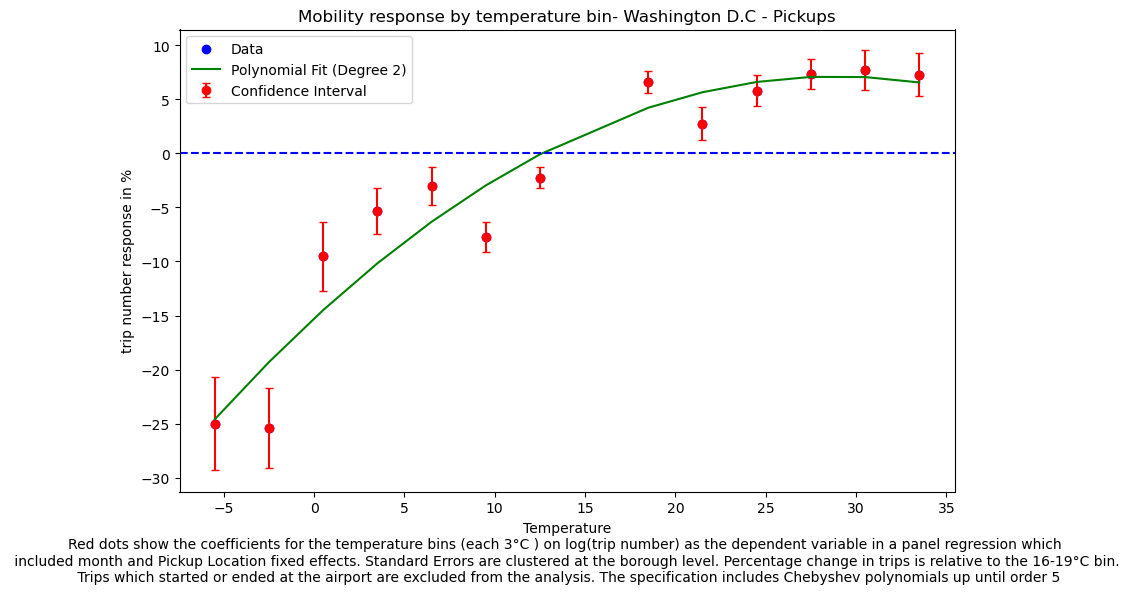

In [40]:
import matplotlib.pyplot as plt
plot_regression(results_DC,'Washington D.C - Pickups','Pickup Location','trip number')